#manipulate_regonline_output

This notebook reads the RegOnline output into a pandas DataFrame and reworks it to have each row contain the attendee, the Doppler Primer Session, the Monday Breakout session, and the Tuesday breakout session in each row.

In [73]:
import pandas as pd
import re

### Read the RegOnline output into a pandas DataFrame

In [277]:
df = pd.read_excel('/Users/matt/projects/EPRV/data/AttendeeReportCrop.xls', encoding='utf-8')

In [278]:
df.columns

Index([u'AgendaItem', u'RegId', u'GroupId', u'FirstName', u'LastName', u'Company'], dtype='object')

In [279]:
#use this if you want to encode the unicode values to ascii.
#this is helpful for displaying non-roman characters within
#the IPython notebook:
df['FirstName'] = [el.encode('ascii', 'ignore') for el in df['FirstName'].values]

In [280]:
joao = df.loc[38, 'FirstName']
print(joao)
print(joao.encode('ascii', 'replace'))
print(joao.encode('ascii', 'ignore'))
print(joao.encode('ascii', 'xmlcharrefreplace'))
print(joao.encode('ascii', 'backslashreplace'))

Joo
Joo
Joo
Joo
Joo


In [281]:
df.loc[36:37]

,AgendaItem,RegId,GroupId,FirstName,LastName,Company
36,Doppler Primer: Instrumentation Challenges,79809251,79809251,Jason,Eastman,CfA
37,Doppler Primer: Not Attending,79200819,79200819,Michael,Endl,McDonald Observatory / University of Texas


### Extract the Sunday Sessions

RegOnline outputs multiple entries for each person, and each entry differs by the `AgendaItem`. `AgendaItem`s exist for all sessions happening on all days. In this section, we extract the sessions happening on Sunday, which are all prefixed by "Doppler Primer: ".

In [282]:
sundf = df[df['AgendaItem'].str.contains('Doppler Primer:')].copy()
len(sundf)

110

Let's create two new columns in our DataFrame: the `Primer`, and the `PrimerID`. The `Primer` column will contain the name of the Doppler Primer session (minus the `Doppler Primer: ` prefix), and the `PrimerID` will be a session identifier that will later be used in plotting.

In [283]:
sundf['PrimerID'] = 0

In [284]:
sundf['Primer'] = [re.search(r'(.*):\s(.*)$', item).group(2) for item in sundf['AgendaItem']]

In [285]:
sundf[['AgendaItem', 'Primer']].head(3)

,AgendaItem,Primer
0,Doppler Primer: Instrumentation Challenges,Instrumentation Challenges
1,Doppler Primer: Doppler code,Doppler code
2,Doppler Primer: Spot Modeling,Spot Modeling


In [286]:
sundf['Primer'].unique()[0]

u'Instrumentation Challenges'

In [287]:
dopID = 0
for agItem in sundf['Primer'].unique():
    sundf.loc[sundf['Primer'] == agItem, 'PrimerID'] = dopID
    dopID += 1

In [288]:
sundf[['AgendaItem', 'Primer', 'PrimerID']].head(4)

,AgendaItem,Primer,PrimerID
0,Doppler Primer: Instrumentation Challenges,Instrumentation Challenges,0
1,Doppler Primer: Doppler code,Doppler code,1
2,Doppler Primer: Spot Modeling,Spot Modeling,2
3,Doppler Primer: Spot Modeling,Spot Modeling,2


### Extract the Monday Sessions

Now to do the same for the Monday sessions.

In [289]:
mondf = df[df['AgendaItem'].str.contains('Monday Break-out:')].copy()
len(mondf)

120

In [290]:
mondf['MonID'] = 0

mondf['Monday'] = [re.search(r'(.*):\s(.*)$', item).group(2) for item in mondf['AgendaItem']]

mondf['Monday'].unique()

monID = 0
for agItem in mondf['Monday'].unique():
    mondf.loc[mondf['Monday'] == agItem, 'MonID'] = monID
    monID += 1

In [291]:
mondf[['AgendaItem', 'Monday', 'MonID']].head(4)

,AgendaItem,Monday,MonID
110,Monday Break-out: Fiber Optic Scrambling,Fiber Optic Scrambling,0
111,Monday Break-out: Not attending,Not attending,1
112,Monday Break-out: Fiber Optic Scrambling,Fiber Optic Scrambling,0
113,Monday Break-out: Telluric Contamination,Telluric Contamination,2


### Extract Tuesday Sessions

In [292]:
tuedf = df[df['AgendaItem'].str.contains('Tuesday Break-out:')].copy()
len(tuedf)

120

In [293]:
tuedf['TueID'] = 0

tuedf['Tuesday'] = [re.search(r'(.*):\s(.*)$', item).group(2) for item in tuedf['AgendaItem']]

tuedf['Tuesday'].unique()

tuesID = 0
for agItem in tuedf['Tuesday'].unique():
    tuedf.loc[tuedf['Tuesday'] == agItem, 'TueID'] = tuesID
    tuesID += 1

In [294]:
tuedf[['AgendaItem', 'Tuesday', 'TueID']].head(4)

,AgendaItem,Tuesday,TueID
230,Tuesday Break-out: Statistical techniques,Statistical techniques,0
231,Tuesday Break-out: Statistical techniques,Statistical techniques,0
232,Tuesday Break-out: Detection Threshold Criteria,Detection Threshold Criteria,1
233,Tuesday Break-out: Detection Threshold Criteria,Detection Threshold Criteria,1


### Combine the DataFrames

In [295]:
fulldf = df[['RegId', 'GroupId', 'FirstName', 'LastName', 'Company']]

In [296]:
print(len(fulldf))
fulldf = fulldf.drop_duplicates()
print(len(fulldf))

350
120


In [297]:
print(len(sundf))
print(len(mondf))
print(len(tuedf))

110
120
120


In [298]:
fulldf.columns

Index([u'RegId', u'GroupId', u'FirstName', u'LastName', u'Company'], dtype='object')

In [299]:
newdf = pd.merge(fulldf, sundf, on='RegId', how='left')
print(len(newdf))

newdf = pd.merge(newdf, mondf, on='RegId', how='left')
print(len(newdf))

newdf = pd.merge(newdf, tuedf, on='RegId', how='left')
print(len(newdf))

120
120
120


In [301]:
newdf.head(5)

,RegId,GroupId_x,FirstName_x,LastName_x,Company_x,AgendaItem_x,GroupId_y,FirstName_y,LastName_y,Company_y,...,Company_x,MonID,Monday,AgendaItem,GroupId_y,FirstName_y,LastName_y,Company_y,TueID,Tuesday
0,79762584,79762584,Arthur,Adams,Yale University,Doppler Primer: Instrumentation Challenges,79762584,Arthur,Adams,Yale University,...,Yale University,0,Fiber Optic Scrambling,Tuesday Break-out: Statistical techniques,79762584,Arthur,Adams,Yale University,0,Statistical techniques
1,79809320,79809320,Guillem,Anglada-Escude,Queen Mary University of London/University of ...,Doppler Primer: Doppler code,79809320,Guillem,Anglada-Escude,Queen Mary University of London/University of ...,...,Queen Mary University of London/University of ...,0,Fiber Optic Scrambling,Tuesday Break-out: Detection Threshold Criteria,79809320,Guillem,Anglada-Escude,Queen Mary University of London/University of ...,1,Detection Threshold Criteria
2,80253872,80253872,Ruth,Angus,University of Oxford/Harvard-Smithsonian Cente...,Doppler Primer: Spot Modeling,80253872,Ruth,Angus,University of Oxford/Harvard-Smithsonian Cente...,...,University of Oxford/Harvard-Smithsonian Cente...,2,Telluric Contamination,Tuesday Break-out: Detection Threshold Criteria,80253872,Ruth,Angus,University of Oxford/Harvard-Smithsonian Cente...,1,Detection Threshold Criteria
3,78665380,78665380,Pamela,Arriagada,"DTM, CIW",Doppler Primer: Spot Modeling,78665380,Pamela,Arriagada,"DTM, CIW",...,"DTM, CIW",3,Barycentric Corrections,Tuesday Break-out: Line Bisectors and decorrel...,78665380,Pamela,Arriagada,"DTM, CIW",2,Line Bisectors and decorrelatio
4,78757182,78757182,Roman,Baluev,Central Astronomical Observatory at Pulkovo of...,Doppler Primer: Spot Modeling,78757182,Roman,Baluev,Central Astronomical Observatory at Pulkovo of...,...,Central Astronomical Observatory at Pulkovo of...,3,Barycentric Corrections,Tuesday Break-out: Detection Threshold Criteria,78757182,Roman,Baluev,Central Astronomical Observatory at Pulkovo of...,1,Detection Threshold Criteria


In [302]:
sundf.columns

Index([u'AgendaItem', u'RegId', u'GroupId', u'FirstName', u'LastName', u'Company', u'PrimerID', u'Primer'], dtype='object')

In [303]:
newdf.columns

Index([u'RegId', u'GroupId_x', u'FirstName_x', u'LastName_x', u'Company_x', u'AgendaItem_x', u'GroupId_y', u'FirstName_y', u'LastName_y', u'Company_y', u'PrimerID', u'Primer', u'AgendaItem_y', u'GroupId_x', u'FirstName_x', u'LastName_x', u'Company_x', u'MonID', u'Monday', u'AgendaItem', u'GroupId_y', u'FirstName_y', u'LastName_y', u'Company_y', u'TueID', u'Tuesday'], dtype='object')

In [307]:
finaldf = 0

In [308]:
finaldf = newdf[['FirstName_x', 'LastName_x', 'Company_x', 'Primer', 'PrimerID', 'Monday', 'MonID', 'Tuesday', 'TueID']]

In [309]:
finaldf.head(5)

,FirstName_x,FirstName_x,LastName_x,LastName_x,Company_x,Company_x,Primer,PrimerID,Monday,MonID,Tuesday,TueID
0,Arthur,Arthur,Adams,Adams,Yale University,Yale University,Instrumentation Challenges,0,Fiber Optic Scrambling,0,Statistical techniques,0
1,Guillem,Guillem,Anglada-Escude,Anglada-Escude,Queen Mary University of London/University of ...,Queen Mary University of London/University of ...,Doppler code,1,Fiber Optic Scrambling,0,Detection Threshold Criteria,1
2,Ruth,Ruth,Angus,Angus,University of Oxford/Harvard-Smithsonian Cente...,University of Oxford/Harvard-Smithsonian Cente...,Spot Modeling,2,Telluric Contamination,2,Detection Threshold Criteria,1
3,Pamela,Pamela,Arriagada,Arriagada,"DTM, CIW","DTM, CIW",Spot Modeling,2,Barycentric Corrections,3,Line Bisectors and decorrelatio,2
4,Roman,Roman,Baluev,Baluev,Central Astronomical Observatory at Pulkovo of...,Central Astronomical Observatory at Pulkovo of...,Spot Modeling,2,Barycentric Corrections,3,Detection Threshold Criteria,1


In [312]:
len(finaldf)

120

In [313]:
finaldf.columns

Index([u'FirstName_x', u'FirstName_x', u'LastName_x', u'LastName_x', u'Company_x', u'Company_x', u'Primer', u'PrimerID', u'Monday', u'MonID', u'Tuesday', u'TueID'], dtype='object')

### Plot Labels

In [317]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, \
     AnnotationBbox
from matplotlib.cbook import get_sample_data
from matplotlib._png import read_png

In [316]:
%matplotlib inline

In [320]:
fn = get_sample_data('/Users/matt/projects/EPRV/images/eprv_label_bkgd.png', asfileobj=False)

In [321]:
arr_lena = read_png(fn)

In [338]:
imagebox = OffsetImage(arr_lena, zoom=1)

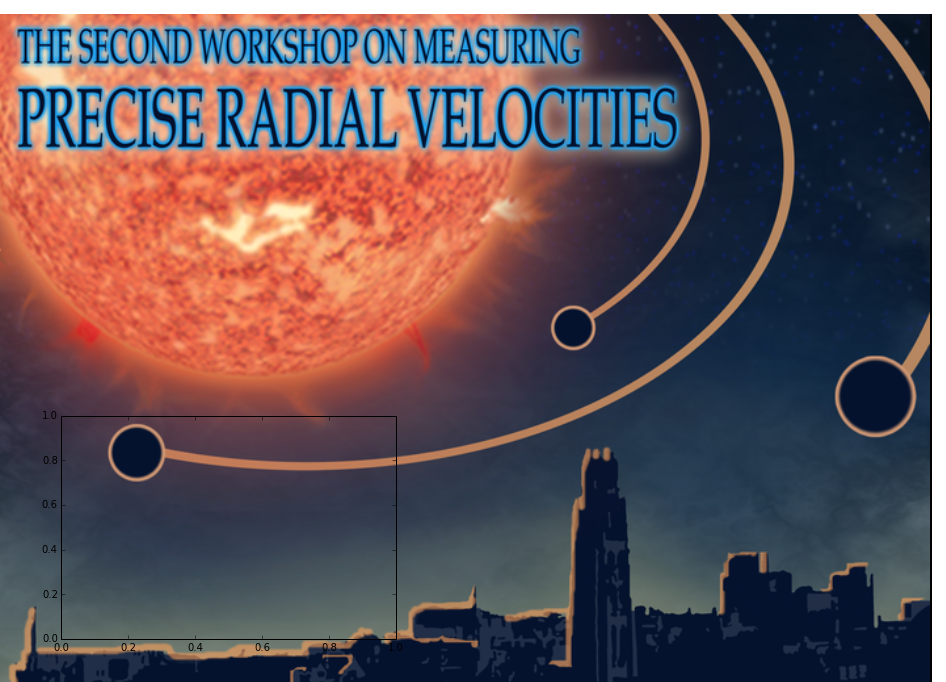

In [339]:
fig, ax = plt.subplots()
ax.add_artist(imagebox)

In [337]:
help(OffsetImage)

Help on class OffsetImage in module matplotlib.offsetbox:

class OffsetImage(OffsetBox)
 |  Method resolution order:
 |      OffsetImage
 |      OffsetBox
 |      matplotlib.artist.Artist
 |      __builtin__.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, arr, zoom=1, cmap=None, norm=None, interpolation=None, origin=None, filternorm=1, filterrad=4.0, resample=False, dpi_cor=True, **kwargs)
 |  
 |  draw(self, renderer)
 |      Draw the children
 |  
 |  get_children(self)
 |  
 |  get_data(self)
 |  
 |  get_extent(self, renderer)
 |  
 |  get_offset(self)
 |      return offset of the container.
 |  
 |  get_window_extent(self, renderer)
 |      get the bounding box in display space.
 |  
 |  get_zoom(self)
 |  
 |  set_data(self, arr)
 |  
 |  set_zoom(self, zoom)
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from OffsetBox:
 |  
 |  __getstate__(self)
 |  
 |  __setstate__(self, state)
 |  
 |  contains(self, mouse